In [1]:
'''
Creating to run Model D Conv1d_mfcc40
different layer system
full mfcc features
Created on 2020.12.08 at 1843

'''
# libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfcc40_axis0_pol.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfcc40_axis0_pol.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfcc40_axis0_pol.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfcc40_axis0_pol.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [3]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(216, 40)


In [4]:
def model_d_conv1d(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(LSTM(64))
#     model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [4]:
def model_d_conv1d_flip(input_shape):
    model = Sequential()
    model.add(Conv1D(256, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [5]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d_flip(input_shape)
model = model_d_conv1d(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

print('input shape, model, optimizer loaded')

model.summary()

input shape, model, optimizer loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 32)           3872      
_________________________________________________________________
activation (Activation)      (None, 216, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 32)           128       
_________________________________________________________________
activation_1 (Activation)    (None, 216, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d (MaxP

In [6]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_d_conv1d_LSTM_pol.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1), # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
#                                                  mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # changed from 'val_accuracy', 'val_loss'
                                                patience=5, 
                                                restore_best_weights=True),
#                                                 verbose = 1, # added verbose for emo1d
#                                                 mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [39]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

# print('model compiled')

model compiled


In [7]:
batch_size = 32

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 1.00363, saving model to ./models_saved/model_d_conv1d_LSTM_pol.h5
609/609 - 21s - loss: 1.0916 - accuracy: 0.3970 - val_loss: 1.0036 - val_accuracy: 0.6310
Epoch 2/150

Epoch 00002: val_loss improved from 1.00363 to 0.94200, saving model to ./models_saved/model_d_conv1d_LSTM_pol.h5
609/609 - 19s - loss: 0.9332 - accuracy: 0.6328 - val_loss: 0.9420 - val_accuracy: 0.6310
Epoch 3/150

Epoch 00003: val_loss improved from 0.94200 to 0.92863, saving model to ./models_saved/model_d_conv1d_LSTM_pol.h5
609/609 - 19s - loss: 0.9073 - accuracy: 0.6328 - val_loss: 0.9286 - val_accuracy: 0.6310
Epoch 4/150

Epoch 00004: val_loss improved from 0.92863 to 0.92438, saving model to ./models_saved/model_d_conv1d_LSTM_pol.h5
609/609 - 18s - loss: 0.9022 - accuracy: 0.6328 - val_loss: 0.9244 - val_accuracy: 0.6310
Epoch 5/150

Epoch 00005: val_loss improved from 0.92438 to 0.92248, saving model to ./models_saved/model_d_conv1d_LSTM_pol.h5
609/609 -

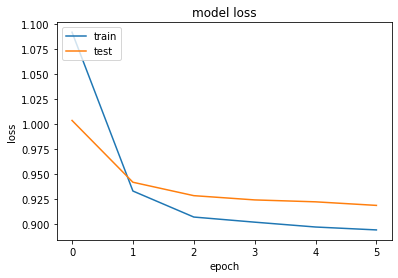

In [8]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

153/153 - 1s - loss: 1.0036 - accuracy: 0.6310
score: 1.00
acc: 0.63


In [10]:
# load labels
with open('./Data_Array_Storage/labels_pol.pkl', 'rb') as f:
    lb = pickle.load(f)

In [11]:
# error analysis

preds = model.predict(X_test, 
                         batch_size=64, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

77/77 [==============================] - 1s 10ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [12]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:180]

,actualvalues,predictedvalues
150,negative,negative
151,negative,negative
152,negative,negative
153,negative,negative
154,neutral,negative
155,negative,negative
156,negative,negative
157,negative,negative
158,negative,negative
159,negative,negative


In [13]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.6310380267214799


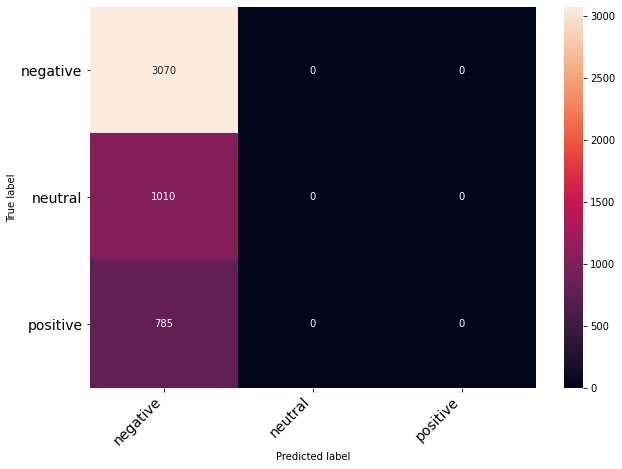

In [14]:
# Get the predictions file 
# finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [15]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

    negative       0.63      1.00      0.77      3070
     neutral       0.00      0.00      0.00      1010
    positive       0.00      0.00      0.00       785

    accuracy                           0.63      4865
   macro avg       0.21      0.33      0.26      4865
weighted avg       0.40      0.63      0.49      4865



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
